In [3]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
v = CountVectorizer(ngram_range=(1,3)) # produces unigram and bigram
v.fit(["Thor Odinson is looking for a job."])
v.vocabulary_

{'thor': 12,
 'odinson': 9,
 'is': 2,
 'looking': 6,
 'for': 0,
 'job': 5,
 'thor odinson': 13,
 'odinson is': 10,
 'is looking': 3,
 'looking for': 7,
 'for job': 1,
 'thor odinson is': 14,
 'odinson is looking': 11,
 'is looking for': 4,
 'looking for job': 8}

In [11]:
corpus = [
    "Thor ate pizza",
    "Loki is tall", 
    "Loki is eating pizza"
]

In [13]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filter1 = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return (" ").join(filter1)

In [17]:
filtered_corpus = [preprocess(text) for text in corpus]
filtered_corpus

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [19]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(filtered_corpus)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [21]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [24]:
v.transform(["Hulk eat pizza"]).toarray()  # as hulk is not in the corpus, we face out of vocabulary problem

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [25]:
import pandas as pd
df = pd.read_json("news_dataset.json")
print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [27]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [54]:
min_samples = 1381


df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state=2110)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state=2101)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state=2981)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state=2281)

In [55]:
df_balanced = pd.concat([df_business, df_crime, df_sports, df_science], axis=0)
df_balanced

,text,category
2011,"Crayola Unveils True-Blue Crayon, And You Get ...",BUSINESS
683,B2B and Social Media Content Marketing,BUSINESS
1672,An Evening With Peter Thiel One of our greates...,BUSINESS
1477,9 Cars That Disappeared In 2014,BUSINESS
11995,7 Secrets Self-Made Millionaires Teach Their K...,BUSINESS
...,...,...
7589,Ovulating Women Prefer Images of Penetration O...,SCIENCE
8639,The Air That May Make You Fat Some puzzling st...,SCIENCE
171,"Hard Work, Hard Times: Self-control and Jobles...",SCIENCE
9981,Lizard Found Preserved In Amber Is 99-Million-...,SCIENCE


In [56]:
df_balanced.category.value_counts()

category
BUSINESS    1381
CRIME       1381
SPORTS      1381
SCIENCE     1381
Name: count, dtype: int64

In [57]:
df_balanced['category_num'] = df_balanced.category.map({
    'BUSINESS': 0, 
    'CRIME': 1, 
    'SPORTS': 2, 
    'SCIENCE': 3
})

In [58]:
df_balanced.head()

,text,category,category_num
2011,"Crayola Unveils True-Blue Crayon, And You Get ...",BUSINESS,0
683,B2B and Social Media Content Marketing,BUSINESS,0
1672,An Evening With Peter Thiel One of our greates...,BUSINESS,0
1477,9 Cars That Disappeared In 2014,BUSINESS,0
11995,7 Secrets Self-Made Millionaires Teach Their K...,BUSINESS,0


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num

)

In [60]:
print(X_train.shape)
X_train.head()

(4419,)


7129    Hubble Captures Breathtaking Portrait Of Blue ...
2954    Mesmerizing NASA Animation Shows Our Planet's ...
6821    CNN: Email Reveals Former District Attorney Ag...
3987    Munenori Kawasaki Was Drunk And Hilarious Afte...
8705    Marcus Mariota Throws Insane Touchdown Pass To...
Name: text, dtype: object

In [61]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [ ]:
# BAG OF WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer BOW', CountVectorizer()),
    ('Multinomial NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       276
           1       0.90      0.91      0.91       277
           2       0.89      0.86      0.88       276
           3       0.90      0.78      0.83       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [ ]:
# BI-GRAMS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer BOW', CountVectorizer(ngram_range=(1, 2))),
    ('Multinomial NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       276
           1       0.90      0.91      0.90       277
           2       0.89      0.84      0.86       276
           3       0.92      0.74      0.82       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [68]:
# TRI - GRAMS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer BOW', CountVectorizer(ngram_range=(1, 3))),
    ('Multinomial NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       276
           1       0.90      0.90      0.90       277
           2       0.90      0.82      0.86       276
           3       0.91      0.73      0.81       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [69]:
X_test[:5]

2481             Jack in the Box Game Targets Millennials 
6138          If You Can't Focus, Blame This Brain Region 
7369     Octopus Valentine's Day Sex Session Scrapped O...
11061    The Huge Question Uber's $100 Million Settleme...
6574     Was the NJ Supercross Awesome? Fuggetaboutit! ...
Name: text, dtype: object

In [70]:
y_test[:5]

2481     0
6138     3
7369     3
11061    0
6574     2
Name: category_num, dtype: int64

In [71]:
y_pred[:5]

array([2, 3, 1, 0, 3])

In [73]:
df_balanced['preprocessed_text'] = df_balanced.text.apply(preprocess)
df_balanced.head()

,text,category,category_num,preprocessed_text
2011,"Crayola Unveils True-Blue Crayon, And You Get ...",BUSINESS,0,Crayola Unveils true Blue Crayon Chance help f...
683,B2B and Social Media Content Marketing,BUSINESS,0,B2B Social Media Content Marketing
1672,An Evening With Peter Thiel One of our greates...,BUSINESS,0,evening Peter Thiel great concern today techno...
1477,9 Cars That Disappeared In 2014,BUSINESS,0,9 car disappear 2014
11995,7 Secrets Self-Made Millionaires Teach Their K...,BUSINESS,0,7 Secrets Self millionaire teach kid teach kid...


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [77]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       276
           1       0.86      0.96      0.91       277
           2       0.88      0.87      0.88       276
           3       0.94      0.79      0.86       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[237,  16,  16,   7],
       [  4, 266,   6,   1],
       [ 18,  12, 240,   6],
       [ 34,  14,  10, 218]])

Text(95.72222222222221, 0.5, 'Truth')

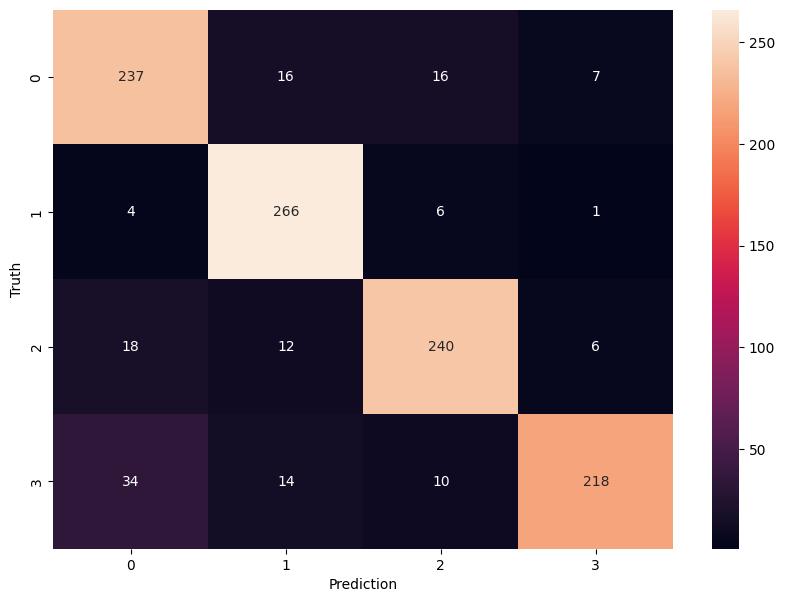

In [80]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')